In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
plt.rcParams['figure.figsize']  = (14, 8)
plt.rcParams['axes.labelsize']  = 16
plt.rcParams['axes.titlesize']  = 16
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 3

In [ ]:
df_yield = pd.read_csv('https://raw.githubusercontent.com/mcaf27/tpibd/main/yield_cor.csv', sep=';').drop(columns='Unnamed: 0')
df_yield.head()

,Grain,Year,Alta Floresta D'Oeste (RO),Ariquemes (RO),Cabixi (RO),Cacoal (RO),Cerejeiras (RO),Colorado do Oeste (RO),Corumbiara (RO),Costa Marques (RO),Espigão D'Oeste (RO),Guajará-Mirim (RO),Jaru (RO),Ji-Paraná (RO),Machadinho D'Oeste (RO),Nova Brasilândia D'Oeste (RO),Ouro Preto do Oeste (RO),Pimenta Bueno (RO),Porto Velho (RO),Presidente Médici (RO),Rio Crespo (RO),Rolim de Moura (RO),Santa Luzia D'Oeste (RO),Vilhena (RO),São Miguel do Guaporé (RO),Nova Mamoré (RO),Alvorada D'Oeste (RO),Alto Alegre dos Parecis (RO),Alto Paraíso (RO),Buritis (RO),Novo Horizonte do Oeste (RO),Cacaulândia (RO),Campo Novo de Rondônia (RO),Candeias do Jamari (RO),Castanheiras (RO),Chupinguaia (RO),Cujubim (RO),Governador Jorge Teixeira (RO),Itapuã do Oeste (RO),Ministro Andreazza (RO),...,Santa Rosa de Goiás (GO),Santa Tereza de Goiás (GO),Santa Terezinha de Goiás (GO),Santo Antônio da Barra (GO),Santo Antônio de Goiás (GO),Santo Antônio do Descoberto (GO),São Domingos (GO),São Francisco de Goiás (GO),São João d'Aliança (GO),São João da Paraúna (GO),São Luís de Montes Belos (GO),São Luiz do Norte (GO),São Miguel do Araguaia (GO),São Miguel do Passa Quatro (GO),São Patrício (GO),São Simão (GO),Senador Canedo (GO),Serranópolis (GO),Silvânia (GO),Simolândia (GO),Sítio d'Abadia (GO),Taquaral de Goiás (GO),Teresina de Goiás (GO),Terezópolis de Goiás (GO),Três Ranchos (GO),Trindade (GO),Trombas (GO),Turvânia (GO),Turvelândia (GO),Uirapuru (GO),Uruaçu (GO),Uruana (GO),Urutaí (GO),Valparaíso de Goiás (GO),Varjão (GO),Vianópolis (GO),Vicentinópolis (GO),Vila Boa (GO),Vila Propício (GO),Brasília (DF)
0,Sorghum,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Wheat,1974.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sorghum,1975.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Wheat,1975.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sorghum,1976.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_yield_per_grain = df_yield.drop(columns='Year').groupby(['Grain']).sum().copy()
df_yield_per_grain.head()

,Alta Floresta D'Oeste (RO),Ariquemes (RO),Cabixi (RO),Cacoal (RO),Cerejeiras (RO),Colorado do Oeste (RO),Corumbiara (RO),Costa Marques (RO),Espigão D'Oeste (RO),Guajará-Mirim (RO),Jaru (RO),Ji-Paraná (RO),Machadinho D'Oeste (RO),Nova Brasilândia D'Oeste (RO),Ouro Preto do Oeste (RO),Pimenta Bueno (RO),Porto Velho (RO),Presidente Médici (RO),Rio Crespo (RO),Rolim de Moura (RO),Santa Luzia D'Oeste (RO),Vilhena (RO),São Miguel do Guaporé (RO),Nova Mamoré (RO),Alvorada D'Oeste (RO),Alto Alegre dos Parecis (RO),Alto Paraíso (RO),Buritis (RO),Novo Horizonte do Oeste (RO),Cacaulândia (RO),Campo Novo de Rondônia (RO),Candeias do Jamari (RO),Castanheiras (RO),Chupinguaia (RO),Cujubim (RO),Governador Jorge Teixeira (RO),Itapuã do Oeste (RO),Ministro Andreazza (RO),Mirante da Serra (RO),Monte Negro (RO),...,Santa Rosa de Goiás (GO),Santa Tereza de Goiás (GO),Santa Terezinha de Goiás (GO),Santo Antônio da Barra (GO),Santo Antônio de Goiás (GO),Santo Antônio do Descoberto (GO),São Domingos (GO),São Francisco de Goiás (GO),São João d'Aliança (GO),São João da Paraúna (GO),São Luís de Montes Belos (GO),São Luiz do Norte (GO),São Miguel do Araguaia (GO),São Miguel do Passa Quatro (GO),São Patrício (GO),São Simão (GO),Senador Canedo (GO),Serranópolis (GO),Silvânia (GO),Simolândia (GO),Sítio d'Abadia (GO),Taquaral de Goiás (GO),Teresina de Goiás (GO),Terezópolis de Goiás (GO),Três Ranchos (GO),Trindade (GO),Trombas (GO),Turvânia (GO),Turvelândia (GO),Uirapuru (GO),Uruaçu (GO),Uruana (GO),Urutaí (GO),Valparaíso de Goiás (GO),Varjão (GO),Vianópolis (GO),Vicentinópolis (GO),Vila Boa (GO),Vila Propício (GO),Brasília (DF)
Grain,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Barley,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.785714e+15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.803150e+15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.822335e+15,0.000000e+00,0.000000e+00,0.000000e+00,2.882797e+16
Beans,1.030043e+16,1.740105e+01,1.349769e+01,2.609546e+01,1.990034e+01,2.164074e+01,1.555834e+01,1.742901e+01,1.995761e+01,1.379121e+15,4.122961e+16,2.125606e+01,1.398031e+01,1.628328e+01,2.006539e+01,2.257487e+01,1.540411e+16,2.166090e+01,1.131118e+01,1.162228e+15,2.200116e+16,2.672727e+15,1.485473e+01,1.044878e+01,2.068110e+01,5.160082e+16,8.772618e+00,6.122956e+16,1.442509e+01,1.010750e+01,1.192025e+01,1.200175e+01,1.033343e+01,3.303825e+16,7.448876e+00,1.334821e+01,1.383600e+01,1.087249e+01,1.623837e+01,1.030890e+01,...,8.124561e+16,7.711718e+00,9.474023e+00,2.185235e+16,7.465904e+16,1.666667e+16,1.188235e+15,1.043726e+01,2.623309e+17,1.101970e+17,1.043998e+01,6.385276e+16,2.065062e+16,1.720122e+17,1.230769e+16,1.080000e+00,3.989242e+16,1.672528e+01,4.621294e+17,3.459304e+16,9.673188e+16,4.371434e+16,2.166506e+01,4.853333e+00,4.563336e+00,2.902609e+17,1.188406e+16,1.183673e+15,4.703339e+16,4.80,4.384167e+16,6.905223e+16,1.585990e+01,1.666667e+16,1.447317e+01,2.958121e+17,2.935425e+17,2.744000e+01,2.285714e+16,4.186914e+17
Fava Beans,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000

In [ ]:
df_yield_per_grain.insert(0, 'Total', np.zeros(df_yield_per_grain.index.shape))

In [ ]:
for grain in df_yield_per_grain.index:
  df_yield_per_grain['Total'].loc[grain] = df_yield_per_grain.drop(columns='Total').loc[grain].mean()
df_yield_per_grain['Total']

Grain
Barley        2.150802e+15
Beans         3.761780e+16
Fava Beans    4.358126e+14
Maize         1.100907e+17
Oats          2.033497e+15
Pea           7.531721e+14
Rye           4.591714e+14
Sorghum       7.530385e+15
Soybeans      4.161019e+16
Wheat         1.451165e+16
Name: Total, dtype: float64

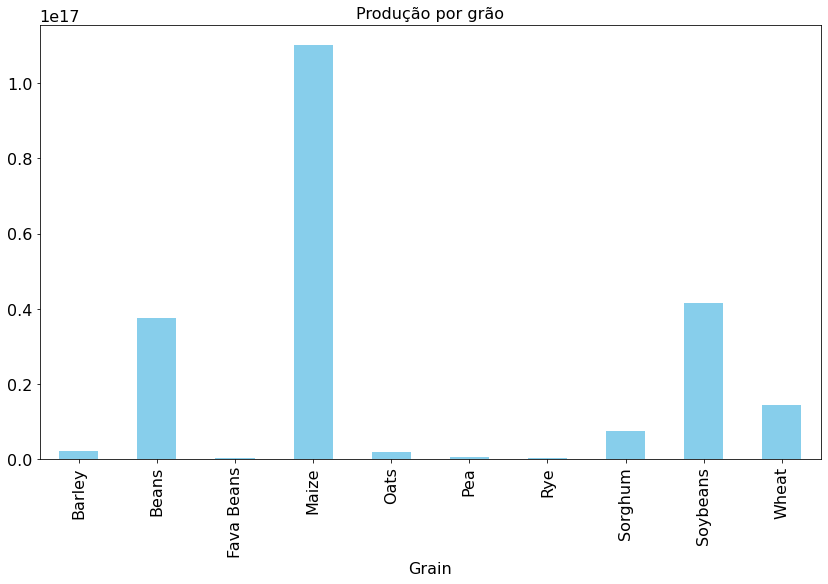

In [ ]:
df_yield_per_grain['Total'].plot.bar(x='Grain', title='Produção por grão', color='skyblue')

In [ ]:
df_yield_per_grain_per_year = df_yield.groupby(['Grain', 'Year']).sum().copy()
df_yield_per_grain_per_year.head()

Alta Floresta D'Oeste (RO)  ...  Brasília (DF)
Grain  Year                                ...               
Barley 1974.0                         0.0  ...            0.0
       1975.0                         0.0  ...            0.0
       1976.0                         0.0  ...            0.0
       1977.0                         0.0  ...            0.0
       1978.0                         0.0  ...            0.0

[5 rows x 5563 columns]

In [ ]:
df_yield_per_grain_per_year['Total'] = df_yield_per_grain_per_year.sum(axis=1)
df_yield_per_grain_per_year['Total'].head()

Grain   Year  
Barley  1974.0    2.266667e+16
        1975.0    6.258925e+16
        1976.0    3.696376e+17
        1977.0    9.178580e+16
        1978.0    3.208103e+17
Name: Total, dtype: float64

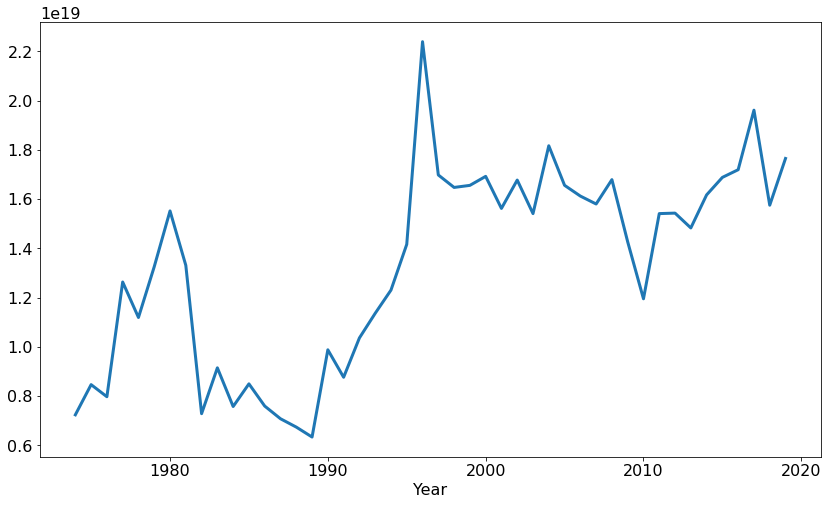

In [ ]:
df_yield_per_grain_per_year['Total'].loc['Maize'].plot.line()

([<matplotlib.axis.XTick at 0x7f905306a590>,
 [Text(0, 0, '1974'),
  Text(0, 0, '1984'),
  Text(0, 0, '1994'),
  Text(0, 0, '2004'),
  Text(0, 0, '2014'),
  Text(0, 0, '2019')])

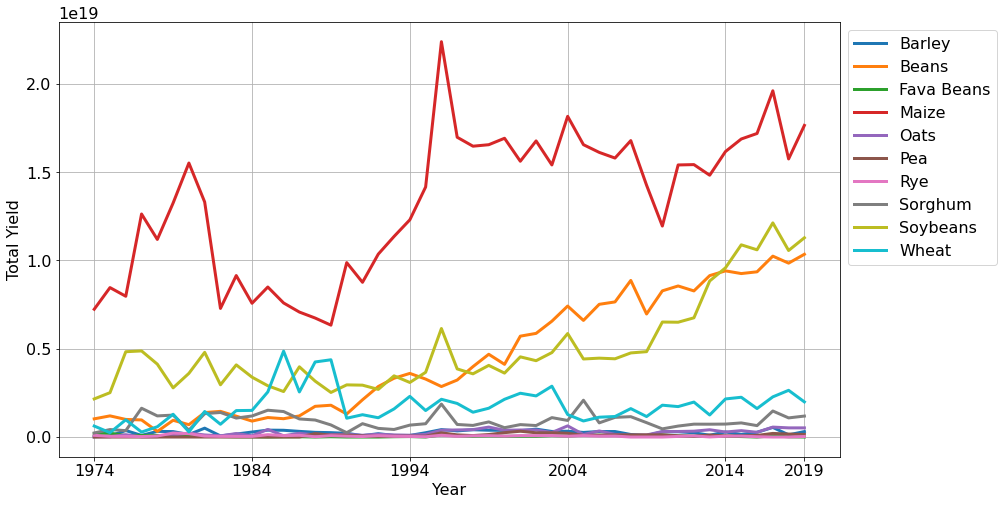

In [ ]:
df_yield_per_grain_per_year.groupby('Grain')['Total'].plot(legend=True, xlabel='Year', ylabel='Total Yield', grid=True)
plt.legend(bbox_to_anchor=(1,1))
plt.xticks([0,10,20,30,40,45], [1974, 1984, 1994, 2004, 2014,2019])
#como deixar o eixo x com os anos??

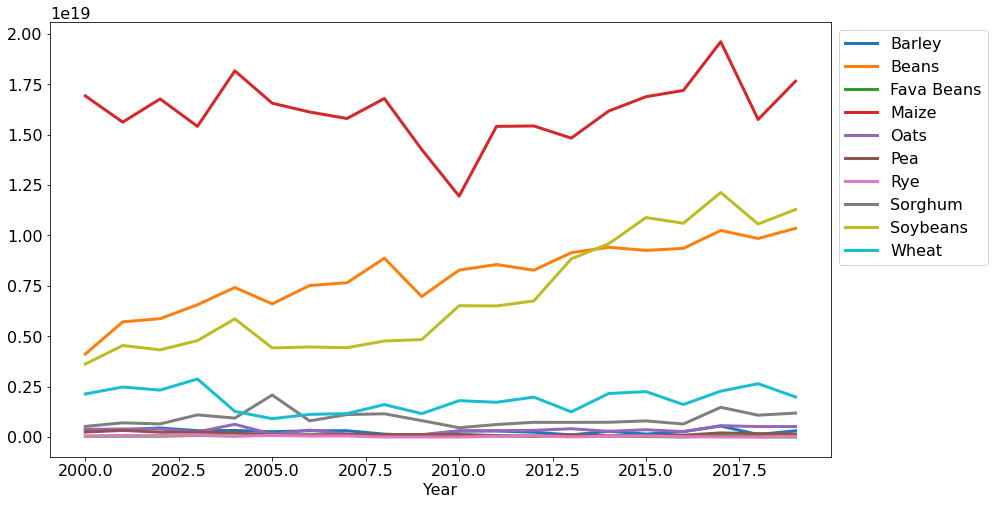

In [ ]:
df_yield_per_grain_per_year[df_yield_per_grain_per_year.index.get_level_values('Year') >= 2000]['Total'].unstack(level=0).plot(kind='line', subplots=False)
plt.legend(bbox_to_anchor=(1,1))

In [ ]:
df_yield.loc[(df_yield['Year'] == 2018) & (df_yield['Grain'] == 'Soybeans')].drop(columns='Year').sum(axis=1)

181    1.056620e+19
dtype: float64

In [ ]:
df_yield.loc[(df_yield['Year'] == 2018) & (df_yield['Grain'] == 'Beans')].drop(columns='Year').sum(axis=1)

273    9.850662e+18
dtype: float64

In [ ]:
df_yield.loc[(df_yield['Year'] == 2005) & (df_yield['Grain'] == 'Beans')].drop(columns='Year').sum(axis=1)

247    6.605253e+18
dtype: float64